# Bounding box detection - Racoon data


## Data files
- images_racoon.zip: contain images of racoons
- train_labels.csv: contains coordinates for bounding box for every image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
!unzip  "/content/drive/MyDrive/Colab Notebooks/Lab-ACV/images.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Lab-ACV/images.zip
   creating: images/
  inflating: images/raccoon-166.jpg  
  inflating: images/raccoon-153.jpg  
  inflating: images/raccoon-141.jpg  
  inflating: images/raccoon-17.jpg   
  inflating: images/raccoon-79.jpg   
  inflating: images/raccoon-78.jpg   
  inflating: images/raccoon-84.jpg   
  inflating: images/raccoon-54.jpg   
  inflating: images/raccoon-154.jpg  
  inflating: images/raccoon-187.jpg  
  inflating: images/raccoon-176.jpg  
  inflating: images/raccoon-57.jpg   
  inflating: images/raccoon-137.jpg  
  inflating: images/raccoon-124.jpg  
  inflating: images/raccoon-167.jpg  
  inflating: images/raccoon-151.jpg  
  inflating: images/raccoon-91.jpg   
  inflating: images/raccoon-111.jpg  
  inflating: images/raccoon-199.jpg  
  inflating: images/raccoon-186.jpg  
  inflating: images/raccoon-53.jpg   
  inflating: images/raccoon-114.jpg  
  inflating: images/raccoon-75.jpg   
  inflating: images/raccoon-104.jpg  

### Mount to drive

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Lab-ACV')

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Lab-ACV'

### Change directory

### Load the training data from train.csv file

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab-ACV/train_labels.csv')
df_train.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Print the shape of the train dataset

In [ ]:
df_train.shape

(173, 8)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [ ]:
IMAGE_SIZE = 128

In [ ]:
df_train.sample(1)

,filename,width,height,class,xmin,ymin,xmax,ymax
107,raccoon-88.jpg,640,480,raccoon,116,41,526,436


### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width and height, x0, y0, x1, y1 in individual variables. <br>
1. Create a list variable known as 'paths' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be resized to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [ ]:
#Create empty arrays
#1. To hold image input
paths = []
coords = np.zeros(shape=(df_train.shape[0],4))

for i, row in df_train.iterrows():
  #print(row)
  paths.append(row.filename)
  coords[i,0] = row.xmin * IMAGE_SIZE/row.width
  coords[i,1] = row.ymin* IMAGE_SIZE/row.width
  coords[i,2] = row.xmax* IMAGE_SIZE/row.width
  coords[i,3] = row.ymax* IMAGE_SIZE/row.width

In [ ]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

In [ ]:
coords

array([[4.69498069e+01, 2.96525097e+01, 8.25328185e+01, 5.83166023e+01],
       [5.81818182e-01, 1.93939394e-01, 8.94060606e+01, 8.35878788e+01],
       [1.57866667e+01, 2.28266667e+01, 5.97333333e+01, 6.18666667e+01],
       [4.84266667e+01, 1.98400000e+01, 8.59733333e+01, 6.35733333e+01],
       [2.71941392e+01, 1.54725275e+01, 9.23663004e+01, 5.95457875e+01],
       [7.49268293e+00, 6.86829268e+00, 1.17385366e+02, 1.49853659e+02],
       [2.53866667e+01, 4.48000000e+00, 7.85066667e+01, 8.51200000e+01],
       [5.24750958e+01, 4.90421456e+00, 1.22114943e+02, 8.14099617e+01],
       [5.14056225e-01, 5.14056225e-01, 7.91646586e+01, 9.04738956e+01],
       [4.29961390e+01, 3.95366795e+00, 8.99459459e+01, 4.39845560e+01],
       [1.30957096e+01, 2.53465347e+00, 8.32211221e+01, 6.88580858e+01],
       [8.40154440e+00, 1.92741313e+01, 1.18115830e+02, 7.26486486e+01],
       [4.35200000e+00, 3.12320000e+01, 7.14240000e+01, 1.27744000e+02],
       [6.83333333e+00, 8.33333333e-01, 1.13833333e

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from PIL import Image
batch_images = np.zeros((len(paths),IMAGE_SIZE, IMAGE_SIZE, 3))
for i,j in enumerate(paths):
  print(j)
  img = Image.open('images/'+j)
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
  img = img.convert('RGB')
  batch_images[i] = preprocess_input(np.array(img, dtype = np.float32))

raccoon-17.jpg
raccoon-11.jpg
raccoon-63.jpg
raccoon-63.jpg
raccoon-60.jpg
raccoon-69.jpg
raccoon-180.jpg
raccoon-200.jpg
raccoon-141.jpg
raccoon-19.jpg
raccoon-84.jpg
raccoon-124.jpg
raccoon-182.jpg
raccoon-111.jpg
raccoon-91.jpg
raccoon-79.jpg
raccoon-93.jpg
raccoon-20.jpg
raccoon-42.jpg
raccoon-139.jpg
raccoon-58.jpg
raccoon-71.jpg
raccoon-183.jpg
raccoon-1.jpg
raccoon-169.jpg
raccoon-82.jpg
raccoon-4.jpg
raccoon-101.jpg
raccoon-10.jpg
raccoon-166.jpg
raccoon-184.jpg
raccoon-38.jpg
raccoon-120.jpg
raccoon-142.jpg
raccoon-149.jpg
raccoon-51.jpg
raccoon-43.jpg
raccoon-123.jpg
raccoon-66.jpg
raccoon-9.jpg
raccoon-178.jpg
raccoon-47.jpg
raccoon-167.jpg
raccoon-54.jpg
raccoon-77.jpg
raccoon-155.jpg
raccoon-89.jpg
raccoon-153.jpg
raccoon-179.jpg
raccoon-115.jpg
raccoon-64.jpg
raccoon-56.jpg
raccoon-44.jpg
raccoon-39.jpg
raccoon-26.jpg
raccoon-162.jpg
raccoon-170.jpg
raccoon-187.jpg
raccoon-131.jpg
raccoon-174.jpg
raccoon-92.jpg
raccoon-193.jpg
raccoon-138.jpg
raccoon-157.jpg
raccoon-108.j

In [ ]:
batch_images

array([[[[-0.38823527, -0.20784312, -0.3098039 ],
         [-0.89019608, -0.7647059 , -0.84313726],
         [-0.9137255 , -0.8509804 , -0.89803922],
         ...,
         [ 0.04313731,  0.51372552,  0.05882359],
         [ 0.04313731,  0.4666667 ,  0.18431377],
         [ 0.26274514,  0.65490198,  0.38823533]],

        [[-0.43529409, -0.27843136, -0.36470586],
         [-0.95294118, -0.86666667, -0.92941177],
         [-0.8509804 , -0.79607844, -0.82745099],
         ...,
         [-0.23921567,  0.21568632, -0.23921567],
         [-0.0745098 ,  0.33333337,  0.00392163],
         [ 0.09019613,  0.44313729,  0.20784318]],

        [[-0.7019608 , -0.57647061, -0.64705884],
         [-0.85882354, -0.77254903, -0.81176472],
         [-0.81960785, -0.78039217, -0.78039217],
         ...,
         [-0.28627449,  0.1686275 , -0.50588238],
         [-0.1607843 ,  0.26274514, -0.31764704],
         [-0.08235294,  0.25490201, -0.02745098]],

        ...,

        [[-0.04313725,  0.27843142, -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


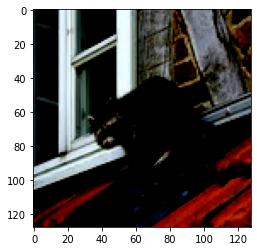

In [ ]:
import matplotlib.pyplot as plt
randnum = np.random.randint(len(batch_images))
plt.imshow(batch_images[randnum])

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3.
### Freeze all the layers and Add convolution layers and reshape layers at the end to ensure the output has 4 coordinates.

In [ ]:
# load the MobileNet network, ensuring the head FC layer sets are
# left off
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Reshape
model = MobileNet(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False)
for layer in model.layers:
  layer.trainable = False

x = model.layers[-1].output
x = Conv2D(4,kernel_size=4)(x)

x = Reshape((4,))(x)

model_mobilenet = Model(inputs = model.input, outputs = x)

## Plot the model and view the whole skeleton using plot_model.

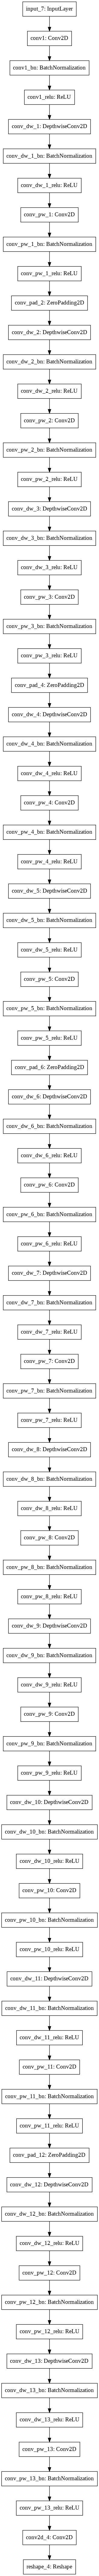

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_mobilenet)

### Define a custom loss function IoU which calculates Intersection Over Union

In [ ]:
import tensorflow as tf
from tensorflow.keras.backend import epsilon

In [ ]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.compat.v1.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [ ]:
model_mobilenet.compile(optimizer='Adam', loss='mse', metrics=IoU)
#Saving the best model using model checkpoint callback
mobilenet_model_checkpoint=tf.keras.callbacks.ModelCheckpoint('mobilenet_model.h5', 
                                                    save_best_only=True, 
                                                    monitor='Iou', 
                                                    mode='max', 
                                                    verbose=1)
model_mobilenet.fit(batch_images, coords, epochs=30, batch_size=32, callbacks=[mobilenet_model_checkpoint])

Epoch 1/30
6/6 [==============================] - 3s 297ms/step - loss: 80.3432 - IoU: 0.7664
Epoch 2/30
6/6 [==============================] - 2s 290ms/step - loss: 71.1638 - IoU: 0.8093
Epoch 3/30
6/6 [==============================] - 2s 289ms/step - loss: 60.0465 - IoU: 0.8187
Epoch 4/30
6/6 [==============================] - 2s 291ms/step - loss: 58.0157 - IoU: 0.8328
Epoch 5/30
6/6 [==============================] - 2s 285ms/step - loss: 58.7321 - IoU: 0.8419
Epoch 6/30
6/6 [==============================] - 2s 289ms/step - loss: 57.6010 - IoU: 0.8493
Epoch 7/30
6/6 [==============================] - 2s 299ms/step - loss: 55.0983 - IoU: 0.8620
Epoch 8/30
6/6 [==============================] - 2s 286ms/step - loss: 54.2640 - IoU: 0.8474
Epoch 9/30
6/6 [==============================] - 2s 286ms/step - loss: 55.7473 - IoU: 0.8600
Epoch 10/30
6/6 [==============================] - 2s 290ms/step - loss: 57.7684 - IoU: 0.8670
Epoch 11/30
6/6 [==============================] - 2s 289ms

### Pick a test image from the given data

In [113]:
from PIL import Image
test_img = Image.open('/content/drive/MyDrive/Colab Notebooks/Lab-ACV/test Images/racoon1.jpeg')

In [114]:
unscaled = Image.open('/content/drive/MyDrive/Colab Notebooks/Lab-ACV/test Images/racoon1.jpeg')

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [115]:
  test_img = test_img.resize((IMAGE_SIZE, IMAGE_SIZE))
  test_img = test_img.convert('RGB')
  test_img = preprocess_input(np.array(test_img, dtype = np.float32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


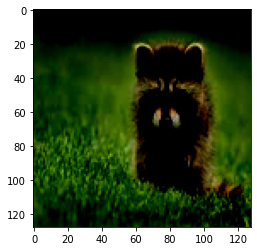

In [116]:
test_img
plt.imshow(test_img)

### Predict the coordinates of the bounding box for the given test image

In [117]:
region = model_mobilenet.predict(np.array([test_img]))
test_img.shape

(128, 128, 3)

In [118]:
region[0][0]

34.045116

In [120]:
image_width = unscaled.size[0]
image_height = unscaled.size[1]

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

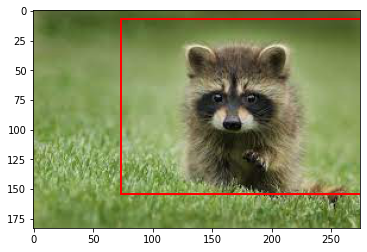

In [121]:
from matplotlib import patches
x0 = int(region[0][0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[0][1] * image_height / IMAGE_SIZE)

x1 = int((region[0][2]) * image_width / IMAGE_SIZE)
y1 = int((region[0][3]) * image_height / IMAGE_SIZE)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# VGG16 Implementation

# VGG 16 Implementation
### Define a variable Image_size which takes accurate input according to the VGG16 model. 

In [127]:
IMG_SIZE_VGG = 224

### With the help of csvr.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 224 * 224 

In [133]:
#Create empty arrays
#1. To hold image input
paths = []
coords = np.zeros(shape=(df_train.shape[0],4))

for i, row in df_train.iterrows():
  #print(row)
  paths.append(row.filename)
  coords[i,0] = row.xmin * IMG_SIZE_VGG/row.width
  coords[i,1] = row.ymin* IMG_SIZE_VGG/row.width
  coords[i,2] = row.xmax* IMG_SIZE_VGG/row.width
  coords[i,3] = row.ymax* IMG_SIZE_VGG/row.width

In [137]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

In [138]:
coords

array([[8.21621622e+01, 5.18918919e+01, 1.44432432e+02, 1.02054054e+02],
       [1.01818182e+00, 3.39393939e-01, 1.56460606e+02, 1.46278788e+02],
       [2.76266667e+01, 3.99466667e+01, 1.04533333e+02, 1.08266667e+02],
       [8.47466667e+01, 3.47200000e+01, 1.50453333e+02, 1.11253333e+02],
       [4.75897436e+01, 2.70769231e+01, 1.61641026e+02, 1.04205128e+02],
       [1.31121951e+01, 1.20195122e+01, 2.05424390e+02, 2.62243902e+02],
       [4.44266667e+01, 7.84000000e+00, 1.37386667e+02, 1.48960000e+02],
       [9.18314176e+01, 8.58237548e+00, 2.13701149e+02, 1.42467433e+02],
       [8.99598394e-01, 8.99598394e-01, 1.38538153e+02, 1.58329317e+02],
       [7.52432432e+01, 6.91891892e+00, 1.57405405e+02, 7.69729730e+01],
       [2.29174917e+01, 4.43564356e+00, 1.45636964e+02, 1.20501650e+02],
       [1.47027027e+01, 3.37297297e+01, 2.06702703e+02, 1.27135135e+02],
       [7.61600000e+00, 5.46560000e+01, 1.24992000e+02, 2.23552000e+02],
       [1.19583333e+01, 1.45833333e+00, 1.99208333e

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the VGG16 accepts 3 channels as inputs   

In [134]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from PIL import Image
batch_images_vgg = np.zeros((len(paths),IMG_SIZE_VGG, IMG_SIZE_VGG, 3))
for i,j in enumerate(paths):
  print(j)
  img = Image.open('images/'+j)
  img = img.resize((IMG_SIZE_VGG, IMG_SIZE_VGG))
  img = img.convert('RGB')
  batch_images_vgg[i] = preprocess_input(np.array(img, dtype = np.float32))

raccoon-17.jpg
raccoon-11.jpg
raccoon-63.jpg
raccoon-63.jpg
raccoon-60.jpg
raccoon-69.jpg
raccoon-180.jpg
raccoon-200.jpg
raccoon-141.jpg
raccoon-19.jpg
raccoon-84.jpg
raccoon-124.jpg
raccoon-182.jpg
raccoon-111.jpg
raccoon-91.jpg
raccoon-79.jpg
raccoon-93.jpg
raccoon-20.jpg
raccoon-42.jpg
raccoon-139.jpg
raccoon-58.jpg
raccoon-71.jpg
raccoon-183.jpg
raccoon-1.jpg
raccoon-169.jpg
raccoon-82.jpg
raccoon-4.jpg
raccoon-101.jpg
raccoon-10.jpg
raccoon-166.jpg
raccoon-184.jpg
raccoon-38.jpg
raccoon-120.jpg
raccoon-142.jpg
raccoon-149.jpg
raccoon-51.jpg
raccoon-43.jpg
raccoon-123.jpg
raccoon-66.jpg
raccoon-9.jpg
raccoon-178.jpg
raccoon-47.jpg
raccoon-167.jpg
raccoon-54.jpg
raccoon-77.jpg
raccoon-155.jpg
raccoon-89.jpg
raccoon-153.jpg
raccoon-179.jpg
raccoon-115.jpg
raccoon-64.jpg
raccoon-56.jpg
raccoon-44.jpg
raccoon-39.jpg
raccoon-26.jpg
raccoon-162.jpg
raccoon-170.jpg
raccoon-187.jpg
raccoon-131.jpg
raccoon-174.jpg
raccoon-92.jpg
raccoon-193.jpg
raccoon-138.jpg
raccoon-157.jpg
raccoon-108.j

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


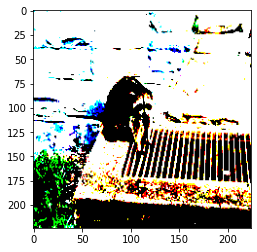

In [136]:
import matplotlib.pyplot as plt
randnum = np.random.randint(len(batch_images_vgg))
plt.imshow(batch_images_vgg[randnum])

### Define a vgg16 model and plot the model using plot_model function.
Hint:- Use RepeatVector,Conv1D,GlobalAveragePooling2D(optional to learner)

In [148]:
# load the VGG16 network, ensuring the head FC layer sets are
# left off
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Reshape, RepeatVector, Conv1D, GlobalAveragePooling2D, Flatten
model_vgg = VGG16(input_shape = (IMG_SIZE_VGG, IMG_SIZE_VGG, 3), include_top=False)
for layer in model_vgg.layers:
  layer.trainable = False

x2 = model_vgg.output
x2 = GlobalAveragePooling2D()(x2)
x2 = RepeatVector(8)(x2)
x2 = Conv1D(4,kernel_size=8, name = "coords")(x2)
x2 = Flatten()(x2)
#x2 = Reshape((4,))(x2)

model_vgg16 = Model(inputs = model_vgg.input, outputs = x2)

### Plot the Vgg16 model using plot_model function.

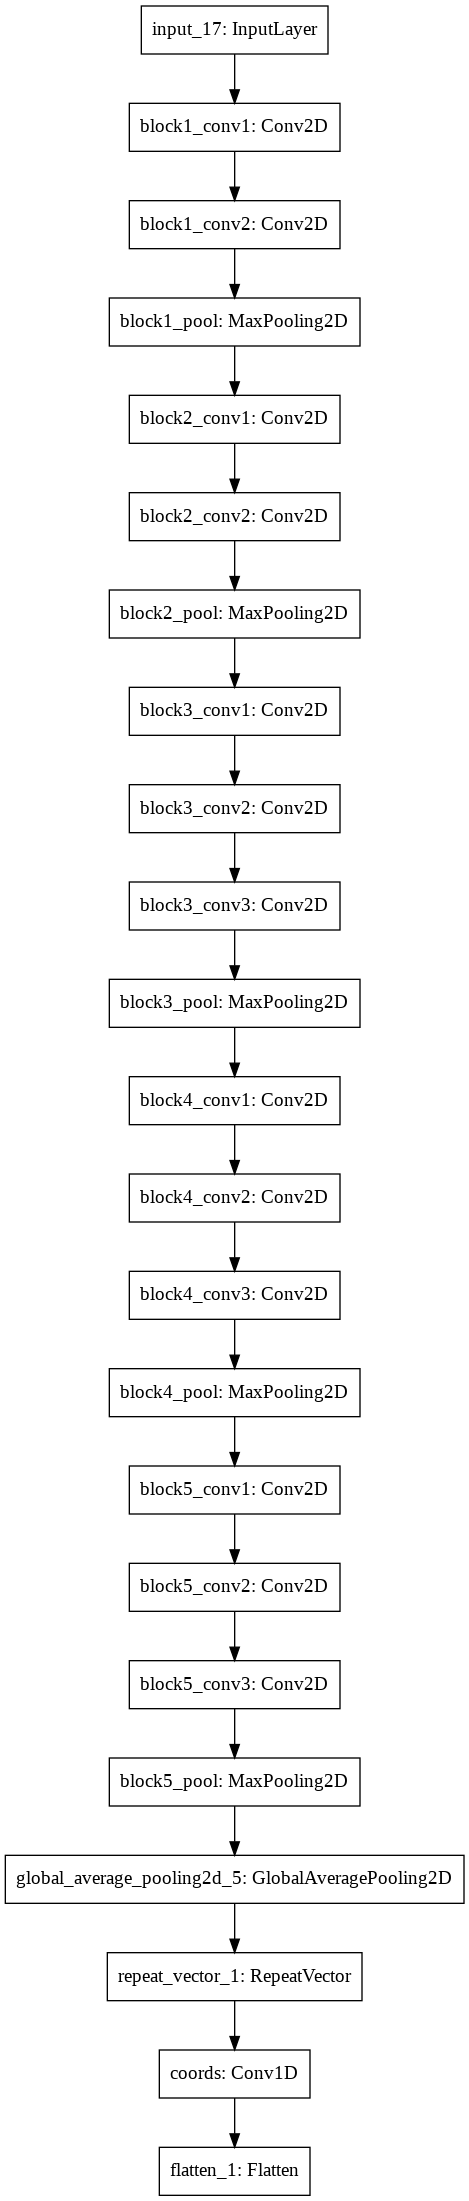

In [149]:
from tensorflow.keras.utils import plot_model
plot_model(model_vgg16)

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [150]:
model_vgg16.compile(optimizer='Adam', loss='mse', metrics=IoU)
#Saving the best model using model checkpoint callback
vgg16_model_checkpoint=tf.keras.callbacks.ModelCheckpoint('vgg16_model.h5', 
                                                    save_best_only=True, 
                                                    monitor='IoU', 
                                                    mode='max', 
                                                    verbose=1)
model_vgg16.fit(batch_images_vgg, coords, epochs=30, batch_size=32, callbacks=[vgg16_model_checkpoint])

Epoch 1/30
6/6 [==============================] - 86s 14s/step - loss: 11362.3496 - IoU: 0.0736
Epoch 2/30
6/6 [==============================] - 85s 14s/step - loss: 4074.3267 - IoU: 0.2758
Epoch 3/30
6/6 [==============================] - 84s 14s/step - loss: 1880.6438 - IoU: 0.4485
Epoch 4/30
6/6 [==============================] - 85s 14s/step - loss: 2196.9678 - IoU: 0.4506
Epoch 5/30
6/6 [==============================] - 85s 14s/step - loss: 2250.0891 - IoU: 0.4163
Epoch 6/30
6/6 [==============================] - 84s 14s/step - loss: 1809.6415 - IoU: 0.4490
Epoch 7/30
6/6 [==============================] - 83s 13s/step - loss: 1588.9220 - IoU: 0.4849
Epoch 8/30
6/6 [==============================] - 81s 13s/step - loss: 1574.1328 - IoU: 0.4710
Epoch 9/30
6/6 [==============================] - 82s 13s/step - loss: 1533.8788 - IoU: 0.4759
Epoch 10/30
6/6 [==============================] - 83s 13s/step - loss: 1431.2166 - IoU: 0.4951
Epoch 11/30
6/6 [==============================]

### Pick a test image from the given data

In [157]:
from PIL import Image
test_img = Image.open('/content/drive/MyDrive/Colab Notebooks/Lab-ACV/test Images/racoon2.jpeg')
unscaled = Image.open('/content/drive/MyDrive/Colab Notebooks/Lab-ACV/test Images/racoon2.jpeg')
image_width = unscaled.size[0]
image_height = unscaled.size[1]

### Resize the image to 224 * 224 and preprocess the image for the VGG16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


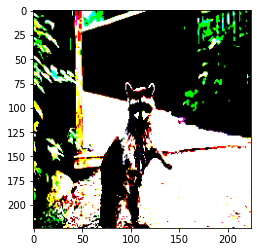

In [158]:
test_img = test_img.resize((IMG_SIZE_VGG, IMG_SIZE_VGG))
test_img = test_img.convert('RGB')
test_img = preprocess_input(np.array(test_img, dtype = np.float32))
plt.imshow(test_img)

### Predict the coordinates of the bounding box for the given test image

In [159]:
region = model_vgg16.predict(np.array([test_img]))
test_img.shape

(224, 224, 3)

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

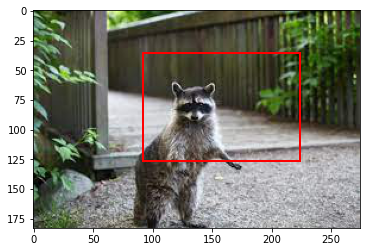

In [160]:
from matplotlib import patches
x0 = int(region[0][0] * image_width / IMG_SIZE_VGG) # Scale the BBox
y0 = int(region[0][1] * image_height / IMG_SIZE_VGG)

x1 = int((region[0][2]) * image_width / IMG_SIZE_VGG)
y1 = int((region[0][3]) * image_height / IMG_SIZE_VGG)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()